### Neural Network Model Prediction & Classification Metrics - CIIC Research - José P. Areia

**WARNING**: Before running the Jupyter notebook, please ensure that you assign the variable **classification_type** to the desired value.

Please note that <mark>the value of **classification_type** must be either 0 or 1.</mark> If you set it to 0, the model will assume that you are working with binary classification. On the other hand, if you set it to 1, the model will assume that you are working with multiclass classification.

Setting the wrong value for **classification_type** can result in errors or unexpected results. Therefore, it is essential that you assign the appropriate value before running the Jupyter Notebook.

In [1]:
# 0 - Binary Classification
# 1 - Multiclass Classification

classification_type = 0

In [2]:
# TensorFlow logging: OFF
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:
# TensorFlow Imports & Metric Definitions
import tensorflow.keras
from tensorflow.keras import backend as K

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

In [4]:
import pickle as pkl

if (classification_type):
    filename = 'Testing_Multiclass.pkl'
else:
    filename = 'Testing_Binary.pkl'


dataset_directory = 'Saved_Datasets/NetSim'
dataset_local = os.path.join(dataset_directory, filename)

# Loading Test Fraction 
with open(dataset_local, 'rb') as f:
    x_test, y_test = pkl.load(f)

print(f'[DONE] Loading Test Fraction')

[DONE] Loading Test Fraction


In [5]:
from tensorflow.keras.models import load_model

if (classification_type):
    filename = 'Model_Multiclass.h5'
else:
    filename = 'Model_Binary.h5'

model_directory = 'Saved_Models/NetSim'
model_local = os.path.join(model_directory, filename)

# Loading Training Model 
model = load_model(model_local, custom_objects = { 'f1_m': f1_m })

print(f'[DONE] Loading Training Model')

[DONE] Loading Training Model


In [6]:
pred = model.predict(x_test)

19480/19480 [==============================] - 23s 1ms/step


In [7]:
import numpy as np
from sklearn import metrics

# Metrics for the classification
def compute_metrics(pred, y_test):
    predict_classes = np.argmax(pred, axis = 1)
    expected_classes = np.argmax(y_test, axis = 1)
    
    correct = metrics.accuracy_score(expected_classes, predict_classes)
    print(f"Accuracy: {correct}")
    
    recall = metrics.recall_score(expected_classes, predict_classes, average = 'weighted')    
    print(f"Recall: {recall}")
       
    precision = metrics.precision_score(expected_classes, predict_classes, average = 'weighted')
    print(f"Precision: {precision}")
    
    f1score = metrics.f1_score(expected_classes, predict_classes, average = 'weighted')
    print(f"F1Score: {f1score}")
    
compute_metrics(pred, y_test)

Accuracy: 0.9924649436194259
Recall: 0.9924649436194259
Precision: 0.9925017993159602
F1Score: 0.9924564841118083


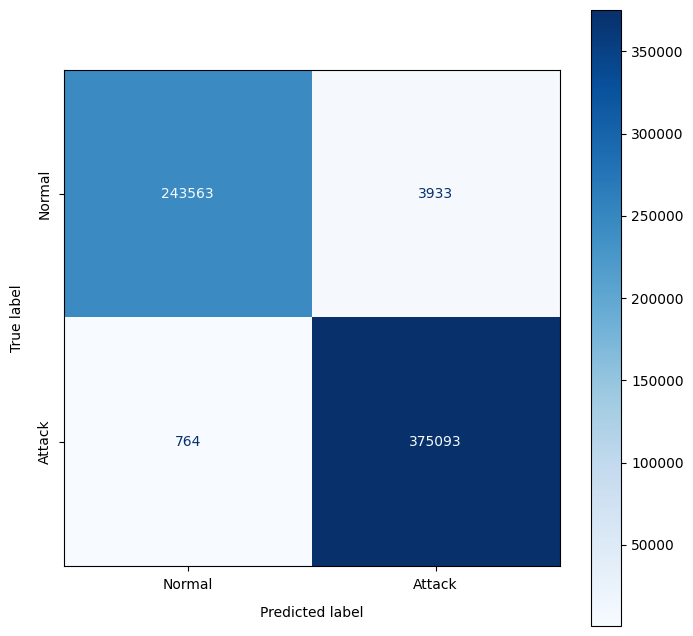

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
predict_classes = np.argmax(pred, axis = 1)
expected_classes = np.argmax(y_test, axis = 1)    
    
cm = confusion_matrix(expected_classes, predict_classes)

if (classification_type):
    cmd = ConfusionMatrixDisplay(cm, display_labels = ['Normal', 'DoS', 'Sinkhole'])
else:
    cmd = ConfusionMatrixDisplay(cm, display_labels = ['Normal', 'Attack'])

# Plot size
fig, ax = plt.subplots(figsize = (8, 8))

# Add axis labels and rotate them
ax.set_xlabel('Predicted labels', rotation = 0, labelpad = 10)
ax.set_ylabel('True labels', rotation = 90, labelpad = 10)

if (classification_type):
    ax.set_xticks([0, 1, 2])
    ax.set_yticks([0, 1, 2])
    ax.set_xticklabels(['Normal', 'DoS', 'Sinkhole'], rotation = 0, ha = 'center', va = 'center')
    ax.set_yticklabels(['Normal', 'DoS', 'Sinkhole'], rotation = 90, ha = 'center', va = 'center')
else:
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Normal', 'Attack'], rotation = 0, ha = 'center', va = 'center')
    ax.set_yticklabels(['Normal', 'Attack'], rotation = 90, ha = 'center', va = 'center')

ax.tick_params(axis = 'x', pad = 10)
ax.tick_params(axis = 'y', pad = 10)

cmd.plot(ax = ax, cmap = plt.cm.Blues)